In [1]:
import pandas as pd
from sklearn import tree


data = pd.read_csv("https://github.com/Brunel-Visualization/Brunel/raw/master/python/examples/data/whiskey.csv")


In [2]:
Rating = len(data) - data['Rating'].count()
print("Missing value of rating = ", Rating)

Missing value of rating =  11


In [3]:
Price = len(data) - data['Price'].count()
print("Missing value of price = ", Price)

Missing value of price =  4


In [4]:
ABV = len(data) - data['ABV'].count()
print("Missing value of ABV = ", ABV)

Missing value of ABV =  13


In [5]:
Age = len(data) - data['Age'].count()
print("Missing value of age = ", Age)

Missing value of age =  109


In [6]:
 ##data = data.drop('Rating', 1)

In [7]:
 data['Rating'] = data['Rating'].fillna(data['Rating'].mode()[0])

In [8]:
data['Price'] = data['Price'].fillna(data['Price'].mode()[0])

In [9]:
data['ABV'] =  data['ABV'].fillna(data['ABV'].mean())

In [10]:
data['Age'] =  data['Age'].fillna(data['Age'].mode()[0])

## Task 3

#### – Investigate outlier(s): for each numeric attribute, perform IQR method to detect outlier.

In [11]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rating    12.0
Price     49.5
ABV        6.0
Age        3.0
dtype: float64


#### Find the outlier using function
#### The function return a boolean vector: True if the element is an outlier. False, otherwise.

In [12]:
import numpy as np   # to manipulate arrays

# a number "a" from the vector "x" is an outlier if 
# a > median(x)+1.5*iqr(x) or a < median-1.5*iqr(x)
# iqr: interquantile range = third interquantile - first interquantile
def outliers(x): 
       return np.abs(x- x.median()) > 1.5*(x.quantile(.75)-x.quantile(0.25))

# Give the outliers for the first column for example
outliers(data['Price'])

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
253    False
254    False
255    False
256    False
257    False
258    False
259    False
260    False
261    False
262    False
263    False
264    False
265    False
266    False
267    False
268    False
269    False
270    False
271     True
272    False
273    False
274    False
275     True
276    False
277    False
278    False
279    False
280     True
281    False
282    False
Name: Price, Length: 283, dtype: bool

In [13]:
outliers(data['ABV'])

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
253    False
254    False
255    False
256    False
257    False
258    False
259    False
260    False
261    False
262    False
263    False
264    False
265     True
266     True
267     True
268     True
269     True
270    False
271    False
272    False
273    False
274    False
275    False
276     True
277    False
278    False
279    False
280    False
281    False
282     True
Name: ABV, Length: 283, dtype: bool

In [14]:
outliers(data['Age'])

0      False
1      False
2      False
3      False
4      False
5      False
6       True
7      False
8       True
9      False
10     False
11     False
12      True
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21      True
22     False
23     False
24      True
25     False
26     False
27     False
28     False
29     False
       ...  
253    False
254     True
255     True
256    False
257     True
258    False
259    False
260     True
261    False
262    False
263    False
264    False
265    False
266     True
267    False
268    False
269    False
270    False
271     True
272    False
273    False
274     True
275     True
276     True
277    False
278    False
279    False
280    False
281     True
282    False
Name: Age, Length: 283, dtype: bool

## Task6 && Task7

In [15]:
data.dtypes

Name         object
Rating      float64
Country      object
Category     object
Price       float64
ABV         float64
Age         float64
Brand        object
dtype: object

In [16]:
from sklearn.decomposition import PCA

df = data[['Rating', 'Price',  'Age', 'ABV']]

pca = PCA(n_components=2, svd_solver='full')
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [17]:
T = pca.transform(df)

In [18]:
components = pd.DataFrame(pca.components_, columns = df.columns, index=[1, 2])
components

,Rating,Price,Age,ABV
1,0.038566,0.998596,0.035921,0.005232
2,-0.988946,0.040475,-0.043658,-0.135803


In [19]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print( "Features by importance:\n", important_features)

get_important_features(T, pca.components_, df.columns.values)

Features by importance:
 [(776.3701237438903, 'Price'), (51.428180626750695, 'Rating'), (27.988045719263262, 'Age'), (7.03350764976869, 'ABV')]


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def draw_vectors(transformed_features, components_, columns):
    """
    This funtion will project your *original* features
    onto your principal component feature-space, so that you can
    visualize how "important" each one was in the
    multi-dimensional scaling
    """

    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ax = plt.axes()

    for i in range(num_columns):
    # Use an arrow to project each original feature as a
    # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

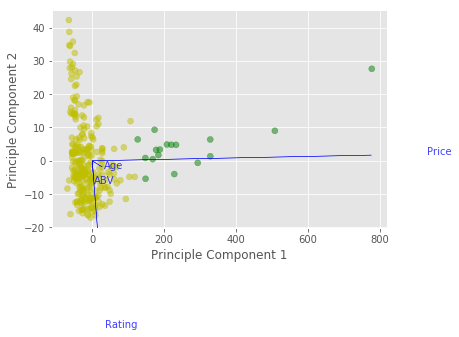

In [21]:
ax = draw_vectors(T, pca.components_, df.columns.values)
T_df = pd.DataFrame(T)
T_df.columns = ['component1', 'component2']

T_df['color'] = 'y'
T_df.loc[T_df['component1'] > 125, 'color'] = 'g'
T_df.loc[T_df['component2'] > 125, 'color'] = 'r'

plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.scatter(T_df['component1'], T_df['component2'], color=T_df['color'], alpha=0.5)
plt.show()

In [22]:
def change_Labels(x):
    
    if x>=40 and x<=60:
        return 'Low'
    if x>=61 and x<=80:
        return 'Medium'
    if x>=81 and x<=100:
        return 'High'

In [23]:
data['Rating'] = data['Rating'].apply(change_Labels)

### PCA

In [24]:
data['Rating'].value_counts()

High      213
Medium     53
Low        17
Name: Rating, dtype: int64

In [25]:
data.corr()

,Price,ABV,Age
Price,1.000000,0.074832,0.588755
ABV,0.074832,1.000000,-0.029453
Age,0.588755,-0.029453,1.000000


In [26]:
# prepare data for classification
    # brands will be converted to integers
brands = {}
counter = 0
for brand in data['Brand']:
    if brand not in brands:
        brands[brand] = counter
        counter+=1
for x in range(len(data['Brand'])):
    data['Brand'][x]=brands[data['Brand'][x]]

C:\Users\SIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [27]:
for col in ['Name','Rating','Country','Category']:
    data[col] = data[col].astype('category')
data.dtypes

Name        category
Rating      category
Country     category
Category    category
Price        float64
ABV          float64
Age          float64
Brand         object
dtype: object

In [28]:

cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
data

,Name,Rating,Country,Category,Price,ABV,Age,Brand
0,63,1,0,0,9.0,40.000000,12.0,0
1,64,1,0,0,10.0,44.610444,12.0,1
2,175,1,4,0,20.0,40.000000,12.0,2
3,231,1,0,0,10.0,44.610444,12.0,3
4,66,1,0,0,12.0,40.000000,12.0,4
5,241,1,4,0,25.0,44.610444,12.0,5
6,59,1,0,0,12.0,40.000000,6.0,6
7,215,1,4,0,17.0,44.610444,12.0,7
8,150,1,8,0,20.0,40.000000,7.0,8
9,91,1,0,0,11.0,44.610444,12.0,9


In [29]:
>>> from sklearn import tree

In [30]:
# prepare dataset
whiskeys={'data':[], 'target':[], 'target_names':[]}
for target_name in brands.keys():
    whiskeys['target_names'].append(target_name)
for x in range(len(data['Brand'])):
    temp_arr = [data['Rating'][x], data['Country'][x], data['Category'][x], data['Price'][x], data['ABV'][x], data['Age'][x]]
    whiskeys['data'].append(temp_arr)
    whiskeys['target'].append(data['Brand'][x])

In [31]:
# separate training data from testing data
from random import randint
test_whiskeys = {'data':[], 'target':[]}
for x in range(round(len(whiskeys['data'])*0.2)):    
    perform_cut = 0
    while perform_cut != 1:
        cut_index = randint(0, len(whiskeys['data'])-1)
        target_brand = whiskeys['target'][cut_index]
        target_count = 0
        for brand in whiskeys['target']:
            if brand == target_brand:
                target_count += 1
        if target_count >2:
            perform_cut = 1

    test_whiskeys['data'].append(whiskeys['data'].pop(cut_index))
    test_whiskeys['target'].append(whiskeys['target'].pop(cut_index))

In [32]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(whiskeys['data'], whiskeys['target'])

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn
cm = confusion_matrix(test_whiskeys['target'], clf.predict(test_whiskeys['data']))
tested_targets = []
for brand in test_whiskeys['target']:
    if [k for k,v in brands.items() if v == brand] not in tested_targets:
        tested_targets.append([k for k,v in brands.items() if v == brand])

31

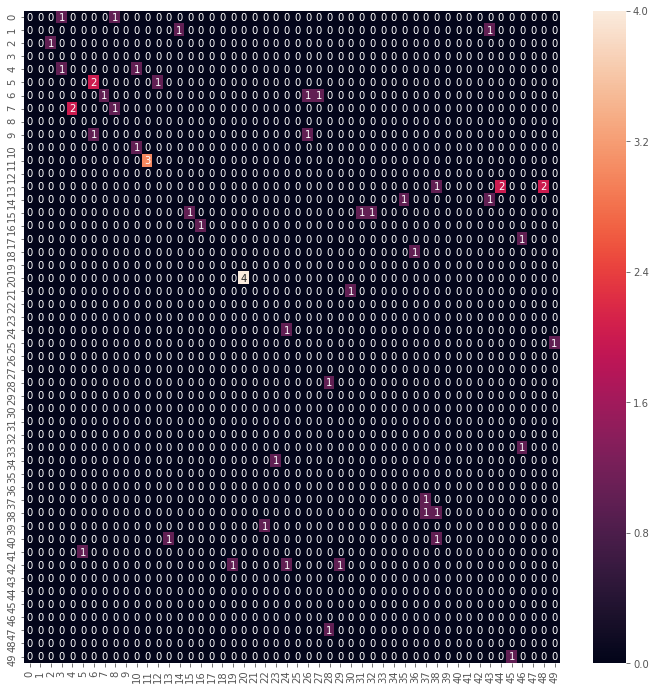

In [34]:
#df_cm = pd.DataFrame(cm, index = tested_targets,
 #                 columns = tested_targets)

plt.figure(figsize = (12,12))
seaborn.heatmap(cm, annot=True)

In [ ]:
cm = confusion_matrix(whiskeys['target'], clf.predict(whiskeys['data']))
tested_targets = []
for brand in test_whiskeys['target']:
    if [k for k,v in brands.items() if v == brand] not in tested_targets:
        tested_targets.append([k for k,v in brands.items() if v == brand])
plt.figure(figsize = (25,25))
seaborn.heatmap(cm, annot=True)